# <span style='color:Gainsboro; font-size:45px'>Projeto de Estudo - Data Analysis</span>

## <span style='color:SteelBlue; font-size:25px'>Projeto - Análise Jogadores FIFA 2022 (EA Sports)</span>
<span style='color:Gray; font-size:15px'>Desenvolvido por: Alan Figueroa</span>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
import seaborn as sns
original_style = sns.axes_style()
import missingno as mno
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import datetime
from babel.numbers import format_currency
from IPython.display import HTML, display

In [2]:
df = pd.read_csv('players_22.csv', low_memory=False)
print(f"Shape do Dataset: {df.shape[0]} linhas | {df.shape[1]} colunas.")
df.head(2)

Shape do Dataset: 19239 linhas | 110 colunas.


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png


In [3]:
df.describe().iloc[:,2:].style.background_gradient(cmap='tab20c')

,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19165.000000,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,18063.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,71.079370,2850451.813201,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5374044.123346,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,6.086213,7613699.947459,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,14948367.962501,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,49.000000,9000.000000,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,16000.000000,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,67.000000,475000.000000,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,806000.000000,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000000,56.000000,48.000000,57.000000,56.000000,57.000000,32.000000,44.000000,26.000000,40.000000,45.000000,38.000000,50.000000,

In [4]:
display(HTML(f"<span style='color:#003333; font-size:18px'>Total de variáveis numéricas:</span>"))
df.describe(include='object').columns

Index(['player_url', 'short_name', 'long_name', 'player_positions', 'dob',
       'club_name', 'league_name', 'club_position', 'club_loaned_from',
       'club_joined', 'nationality_name', 'nation_position', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'player_tags', 'player_traits',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object')

In [5]:
display(HTML(f"<span style='color:#003333; font-size:18px'>Total de variáveis tipo string:</span>"))
df.describe().columns

Index(['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision

#### Verificando se o dataset possui valores ausentes para corrigí-los:

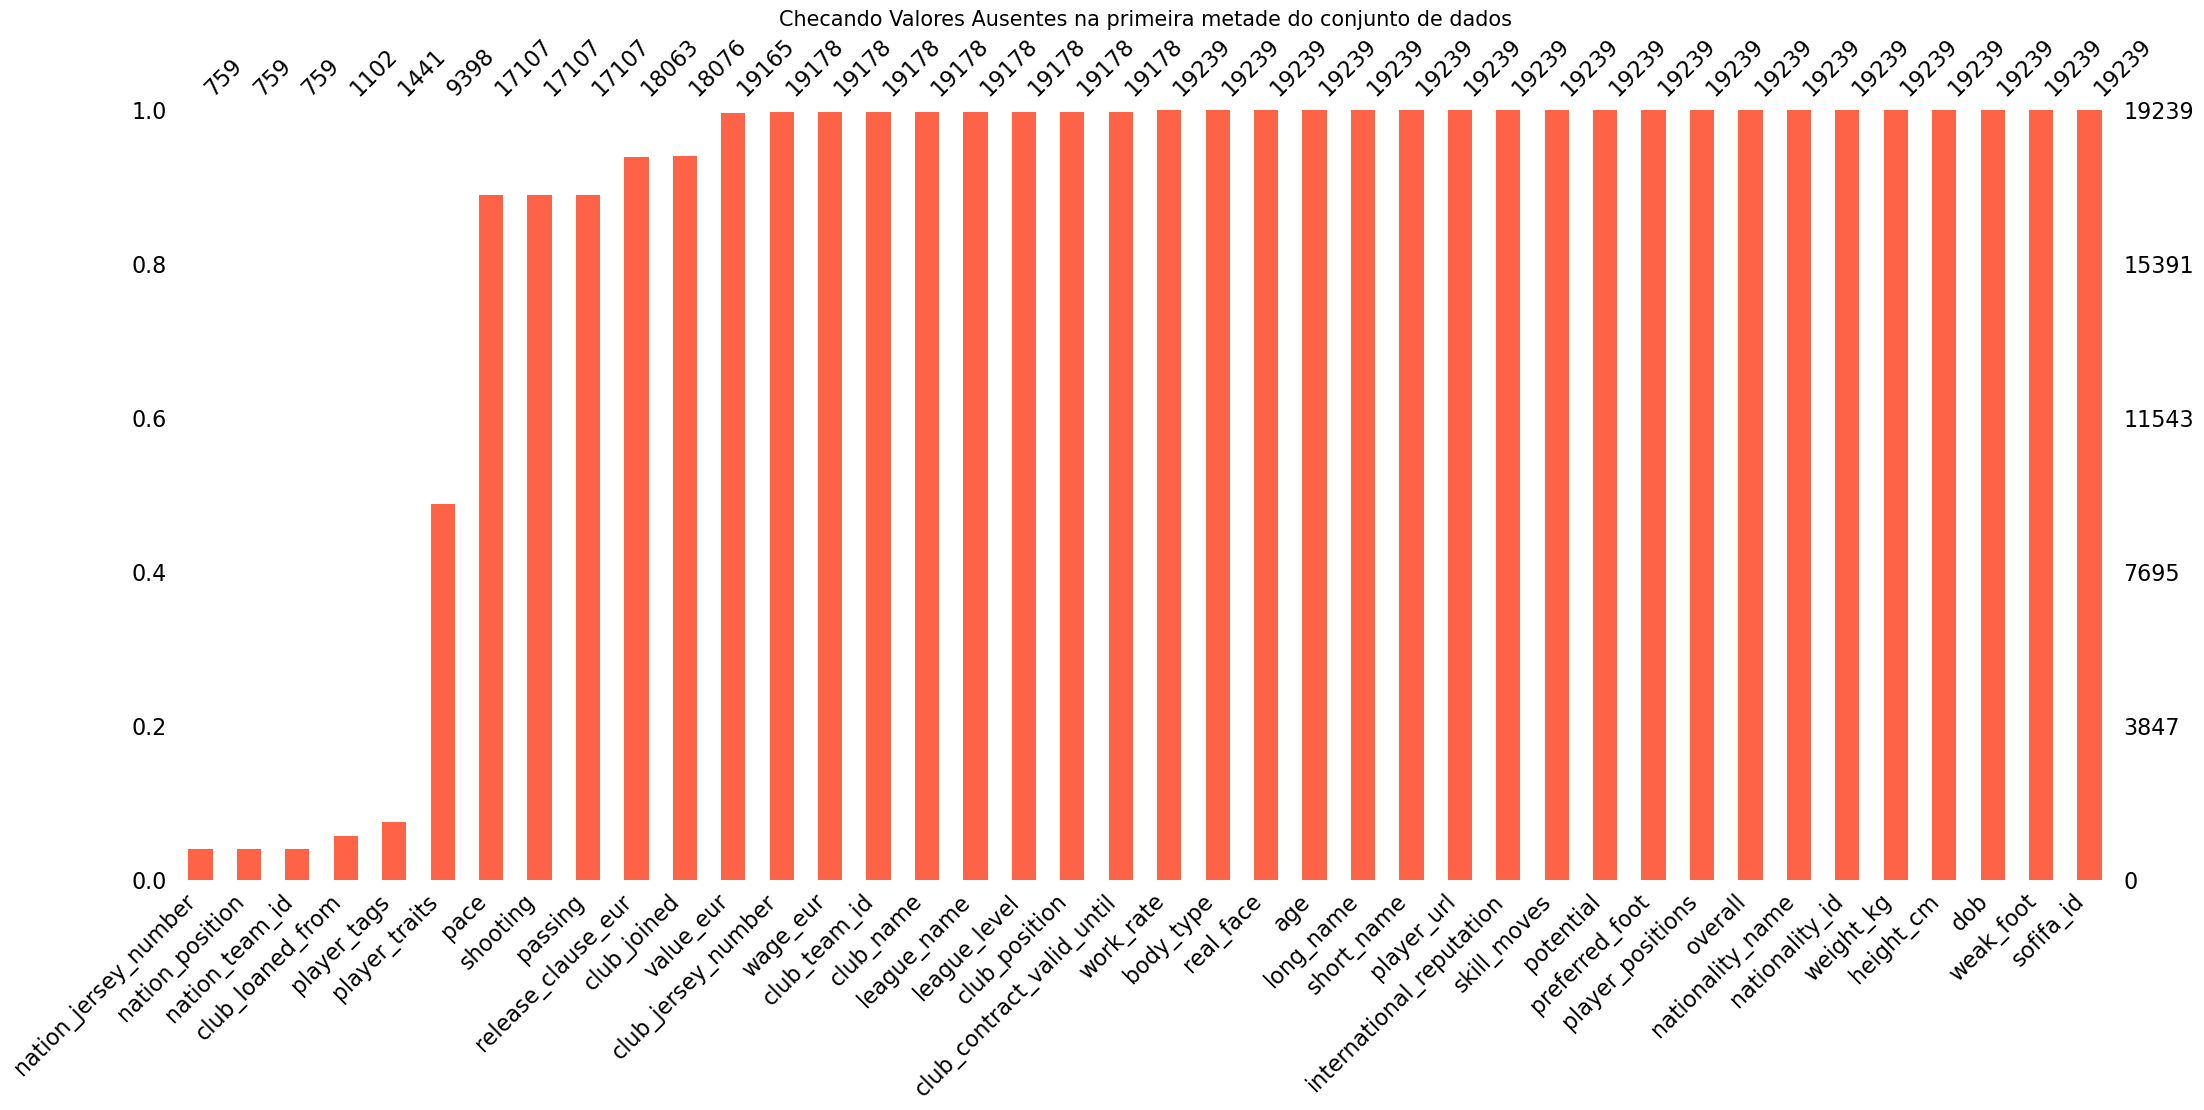

In [6]:
mno.bar(df.iloc[:,:40],
        color='tomato',
        sort='ascending')
plt.title('Checando Valores Ausentes na primeira metade do conjunto de dados', size=15)
plt.show()

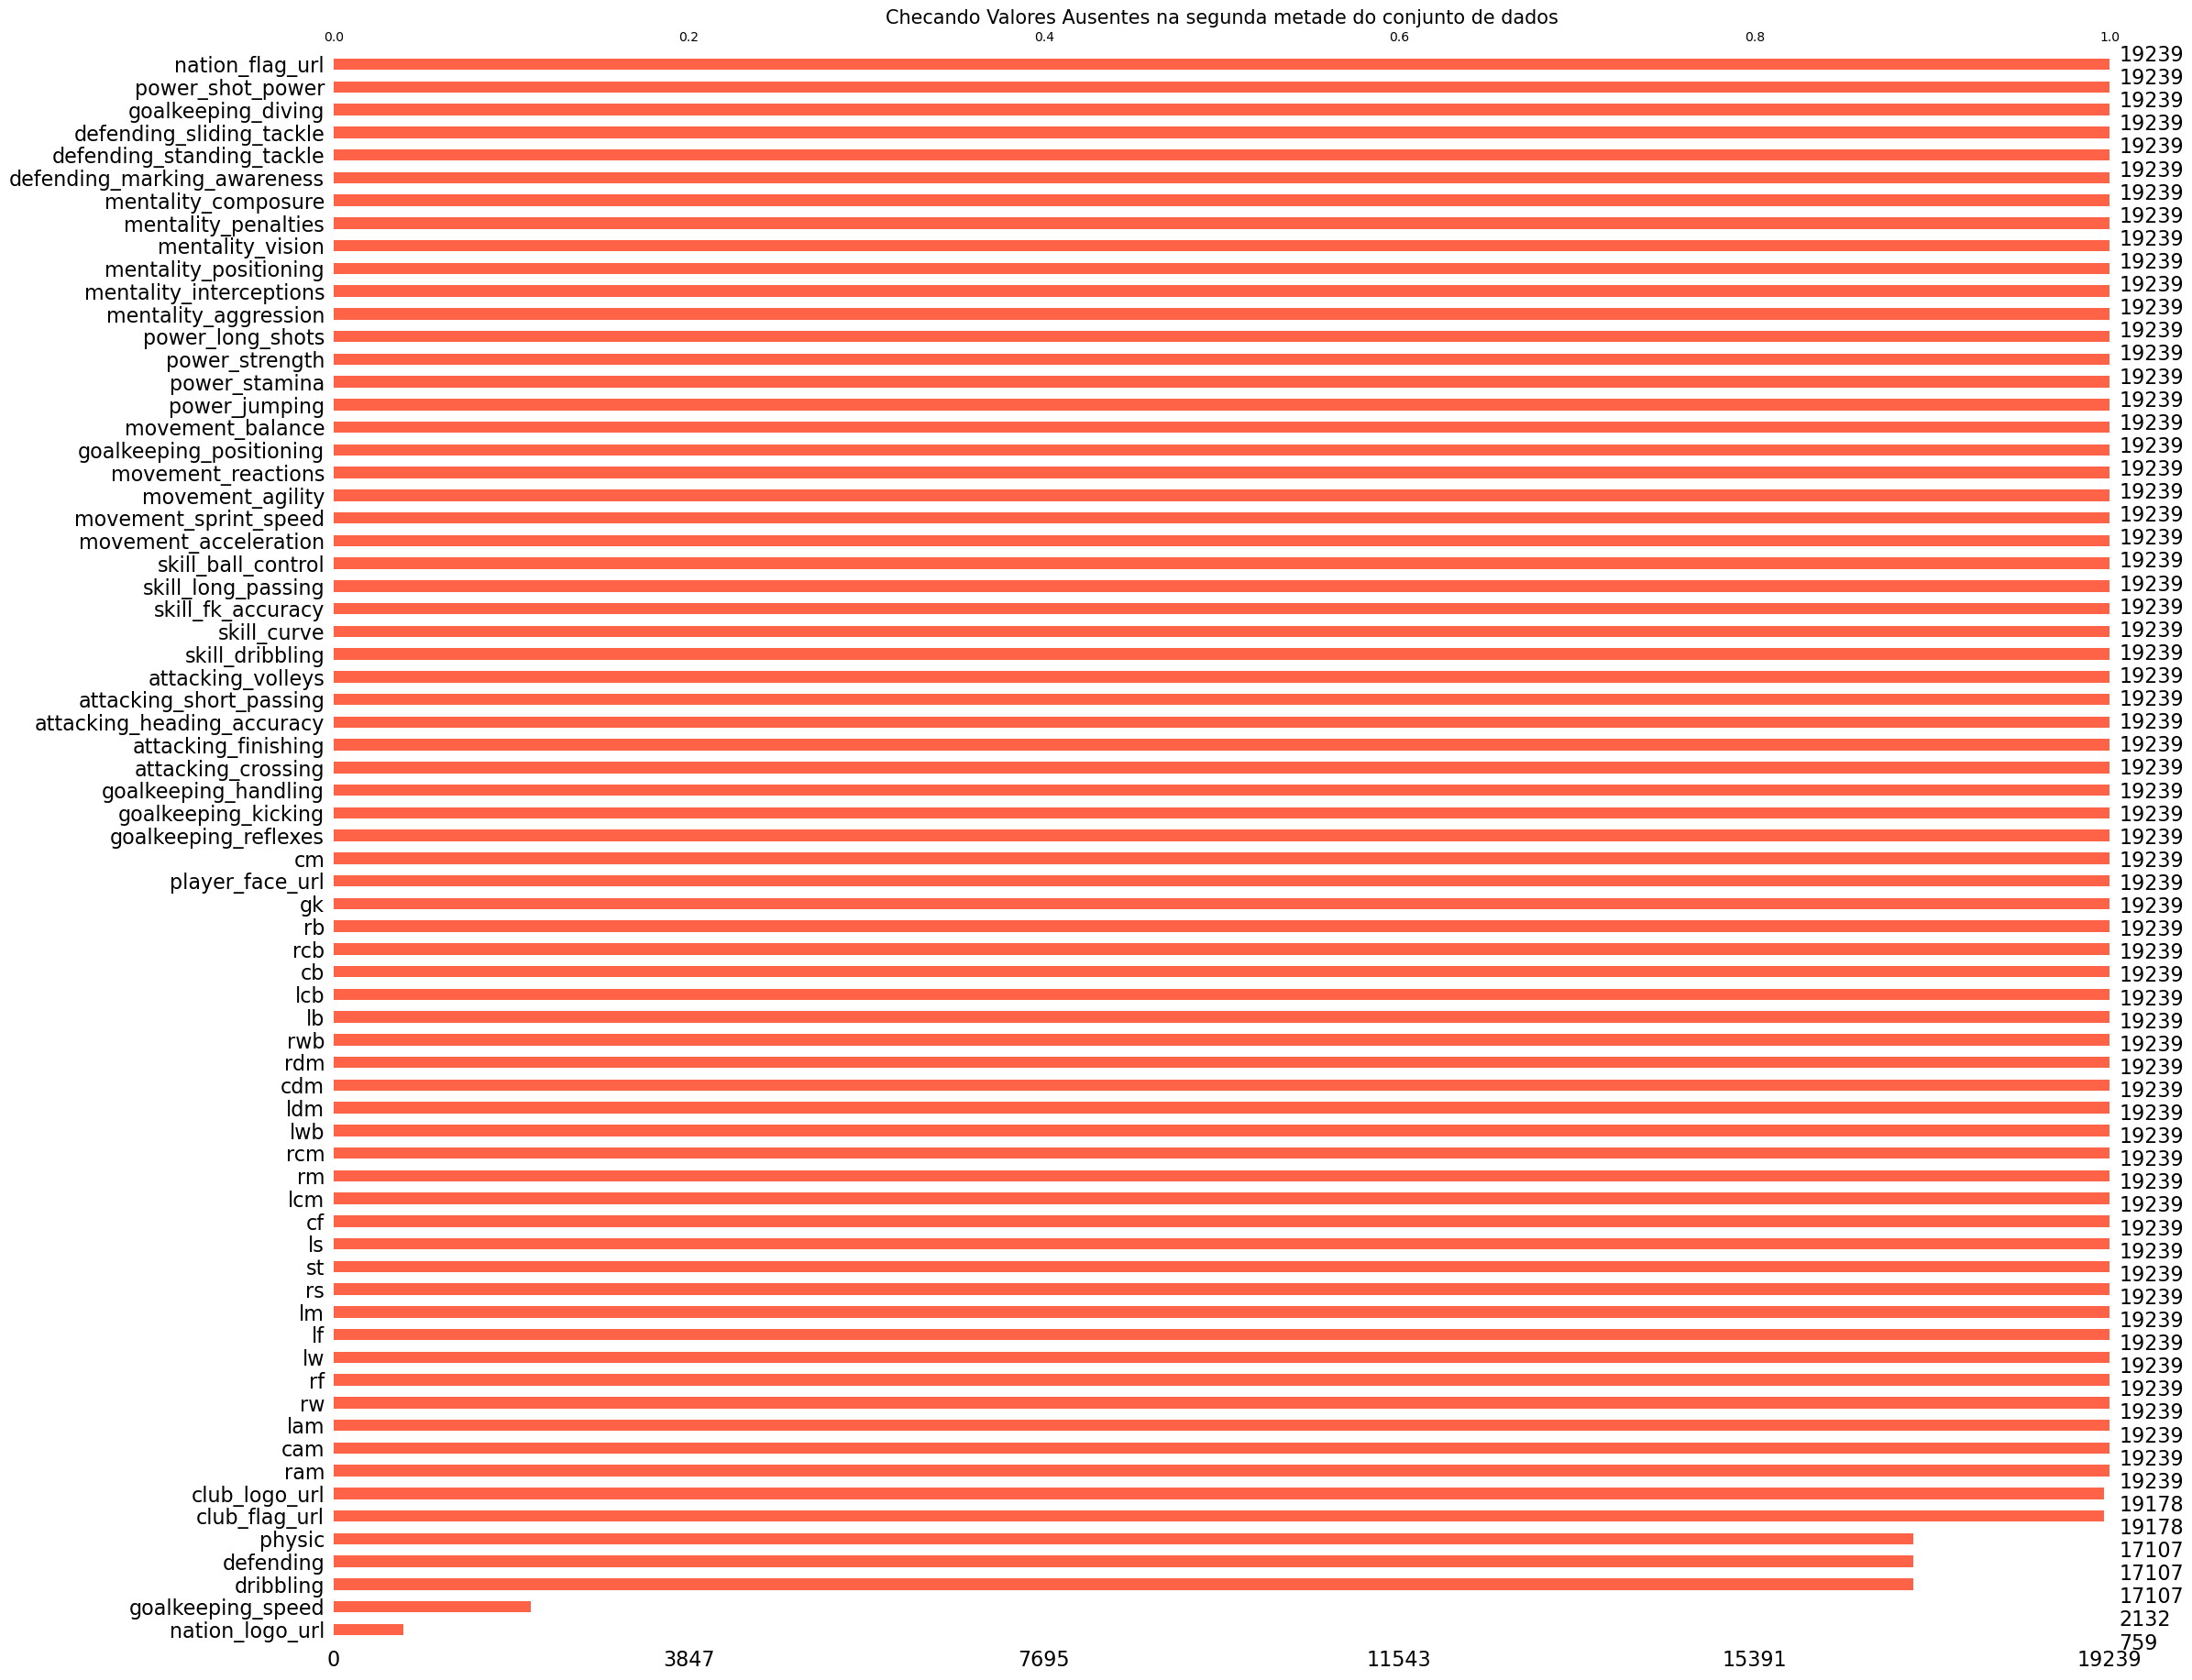

In [7]:
mno.bar(df.iloc[:,40:],
        color='tomato',
        sort='ascending')
plt.title('Checando Valores Ausentes na segunda metade do conjunto de dados', size=15)
plt.show()

<span style='color:#006699; font-size:16px'>O Conjunto de dados possue 19339 registros. Há algumas variáveis quase completas com 19.178 registros,  4 com valores um pouco inferiores e 14 variáveis abaixo de 17.200 registros. Além disso grande parte das variáveis não estão no seu "tipo correto". Decidimos que vamos preencher as variáveis com diferentes técnicas/valores e realizar algumas transformações. 6 das variáveis são agrupametos de outras que foram calculadas para executar análises específicas. Vamos apagar elas e criá-las novamente.<span style='color:white'> Não vamos usar todas as variáveis do dataset, não apago elas totalmente porque possa ser que surja uma nova ideia e eu as tenho disponíveis para uso; E não está comprometendo o desempenho de minha análise e processamento. </span></span>

In [8]:
df['goalkeeping_speed'] = df['goalkeeping_speed'].fillna(0)

df['release_clause_eur'] = df['release_clause_eur'].fillna(df['release_clause_eur'].median())
df['value_eur'] = df['value_eur'].fillna(df['value_eur'].median())
df['club_joined'] = df['club_joined'].fillna('Não Informado')
df['club_jersey_number'] = df['club_jersey_number'].fillna(99)
df['wage_eur'] = df['wage_eur'].fillna(df['wage_eur'].mean())
df['club_team_id'] = df['club_team_id'].fillna(999)
df['club_name'] = df['club_name'].fillna('Não Informado')
df['league_name'] = df['league_name'].fillna('Não Informado')
df['league_level'] = df['league_level'].fillna('Não Informado')
df['club_position'] = df['club_position'].fillna('SUB')
df['club_contract_valid_until'] = df['club_contract_valid_until'].fillna(df['club_contract_valid_until'].mean())
df['club_logo_url'] = df['club_logo_url'].fillna('Não Informado')
df['club_flag_url'] = df['club_flag_url'].fillna('Não Informado')

df.drop(['nation_team_id','nation_jersey_number','nation_position','club_loaned_from','player_tags','pace', 'shooting','passing',
         'player_traits','dribbling','defending','physic','nation_logo_url'], axis=1, inplace=True)

df['club_contract_valid_until'] = df['club_contract_valid_until'].apply(lambda x: int(str(x).split('.')[0]))
df['wage_eur'] = df['wage_eur'].apply(lambda x: int(str(x).split('.')[0]))

#### Agrupando variáveis para criar as variáveis de habilidades

Abaixo vamos criar algumas variáveis para avalização dos jogadores através do agrupamento de outras.

Essas novas variáveis de habilidades condensadas são usadas para avaliar e classificar as capacidades técnicas, físicas e mentais dos jogadores de futebol em diferentes aspectos do jogo.

A criação abaixo é uma sugestão minha que é diferente ao que aparentemente foi determinado no dataset, ou seja, agrupei de forma ligeiramente diferentes as variáveis que compõem os agrupamentos. Fique a vontade para mudar caso tenha uma visão diferente do conceito de cada uma das habilidades apresentadas como também para formar outras.

In [9]:
def attack(df):
    return int(round(df[['attacking_crossing','attacking_finishing',
                         'attacking_heading_accuracy','attacking_volleys',
                         'attacking_crossing','skill_fk_accuracy',
                         'attacking_short_passing','skill_curve','mentality_penalties']].mean().mean()))

def defend(df):
    return int(round(df[['defending_marking_awareness','defending_standing_tackle',
                         'defending_sliding_tackle','movement_acceleration',
                         'mentality_interceptions','mentality_positioning','power_jumping']].mean().mean()))

def phisical(df):
    return int(round(df[['movement_acceleration','movement_sprint_speed','movement_agility',
                         'movement_reactions','power_jumping','power_stamina','power_strength']].mean().mean()))

def mental_reactions(df):
    return int(round(df[['movement_reactions','movement_balance','mentality_composure',
                         'mentality_vision','mentality_aggression']].mean().mean()))

def passing(df):
    return int(round(df[['attacking_crossing','attacking_short_passing','skill_long_passing',
                         'mentality_vision','power_jumping']].mean().mean()))

def control_ball(df):
    return int(round(df[['skill_ball_control','movement_agility','skill_dribbling',
                         'power_jumping','movement_reactions']].mean().mean()))

def goalkeeper(df):
    return int(round(df[['goalkeeping_diving','goalkeeping_handling', 'goalkeeping_kicking',
                         'goalkeeping_positioning', 'goalkeeping_reflexes','goalkeeping_speed']].mean().mean()))

df['attack'] = df.apply(attack, axis=1)
df['defend']   = df.apply(defend, axis=1)
df['phisical']    = df.apply(phisical, axis=1)
df['mental_reactions']   = df.apply(mental_reactions, axis=1)
df['passing']  = df.apply(passing, axis=1)
df['control_ball']     = df.apply(control_ball, axis=1)
df['goalkeeper']    = df.apply(goalkeeper, axis=1)


## Visualizações

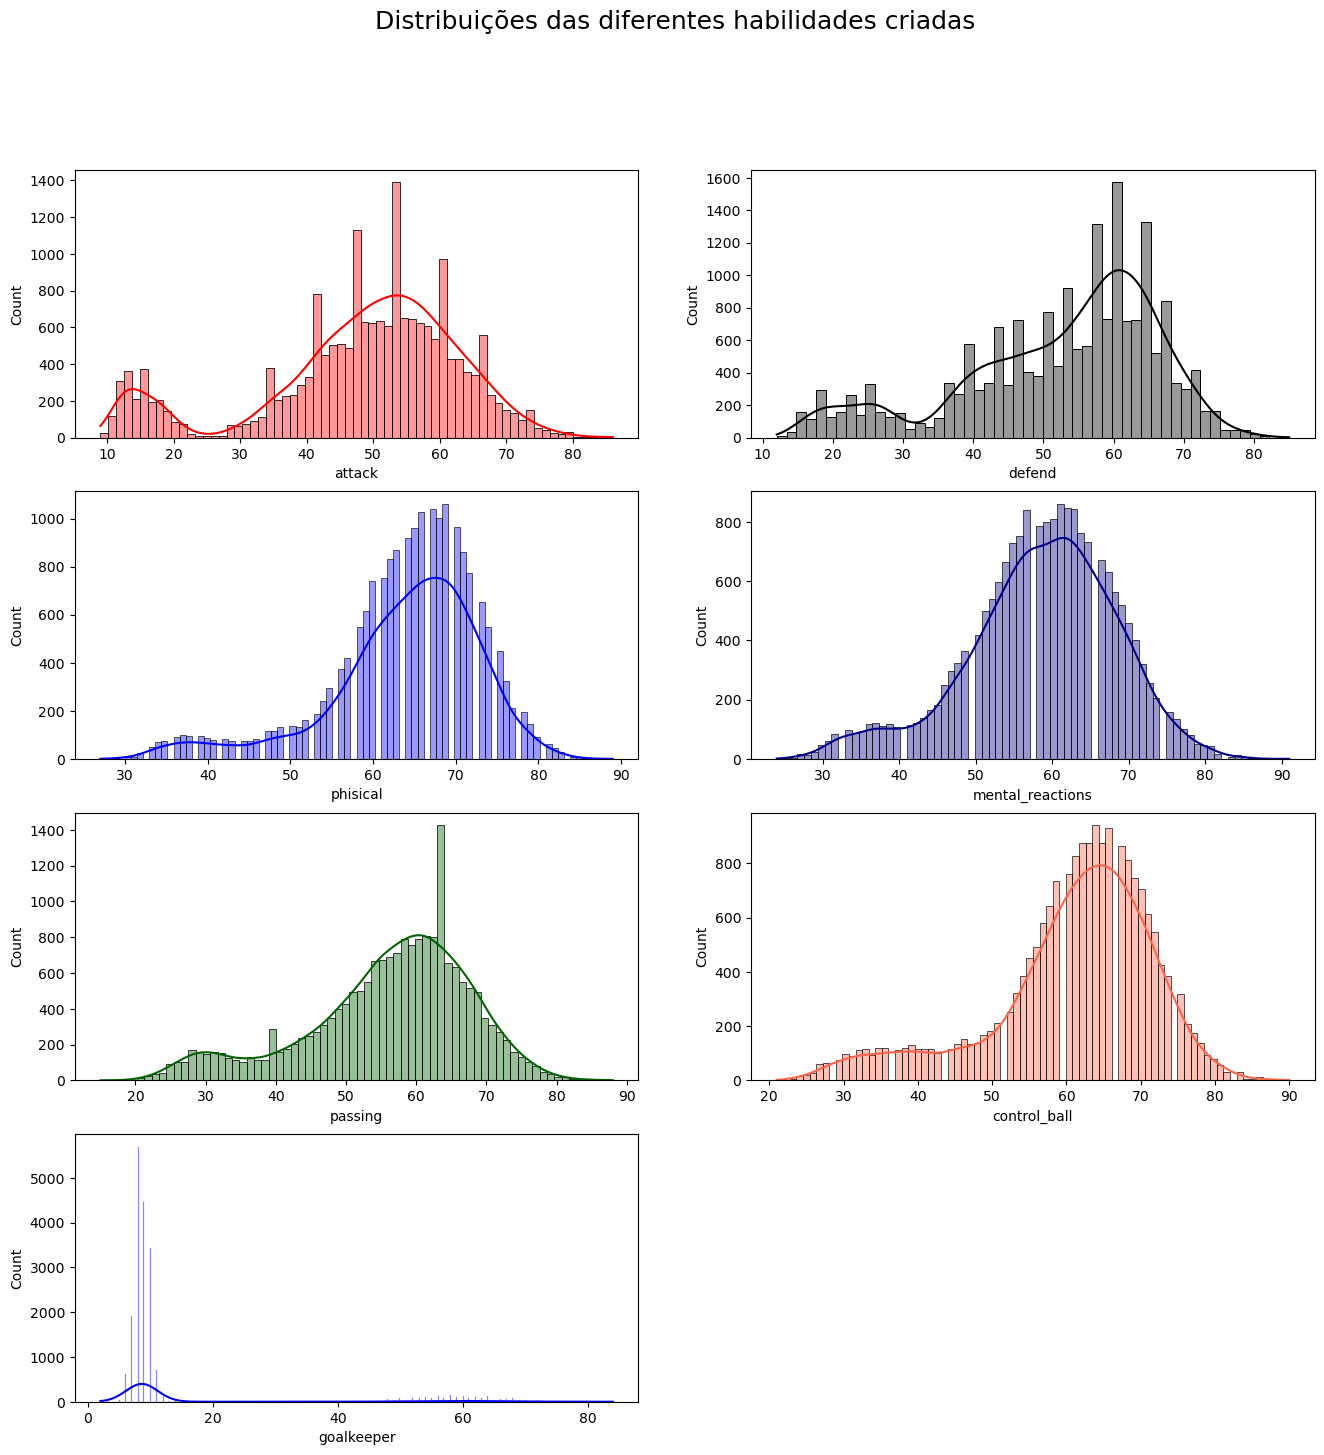

In [10]:
colunas = ['attack', 'defend', 'phisical', 'mental_reactions','passing', 'control_ball', 'goalkeeper']
colors = ['Red','Black','Blue','DarkBlue','DarkGreen','Tomato','Blue','Purple']
plt.figure(figsize=(16,16))
plt.suptitle('Distribuições das diferentes habilidades criadas', size=18)
for n, col in enumerate(colunas):
    plt.subplot(4,2,n+1)
    sns.histplot(df[col], color=colors[n], kde=True, alpha=0.4)

In [11]:
display(HTML(f"<span style='color:#003333; font-size:18px'>Notamos que em relação às habilidades, os jogadores se encontram, em maioria com:</span>"))
colunas_h = ['attack','defend','phisical','mental_reactions','passing','control_ball','goalkeeper']
for col in colunas_h:
    print(F"Média de pontos em {col} : {round(df[col].mean())}")

Média de pontos em attack : 48
Média de pontos em defend : 52
Média de pontos em phisical : 64
Média de pontos em mental_reactions : 59
Média de pontos em passing : 56
Média de pontos em control_ball : 61
Média de pontos em goalkeeper : 14


In [12]:
display(HTML(f"<span style='color:#003333; font-size:18px'>Reputação Internacional (Máx 5 pontos)</span>"))
display(HTML(f"<span style='color:red; font-size:16px'>Quantidade de jogadores que receberam 5 estrelas = {len(df[df['international_reputation'] == 5])} jogadores\n</span>"))

df[df['international_reputation'] == 5]['short_name'].to_frame().reset_index(drop=True)

,short_name
0,L. Messi
1,R. Lewandowski
2,Cristiano Ronaldo
3,Neymar Jr
4,J. Oblak
5,M. Neuer
6,L. Suárez
7,Z. Ibrahimović


In [13]:
display(HTML(f"<span style='color:red; font-size:16px'>Quantidade de jogadores que receberam 4 estrelas = {len(df[df['international_reputation'] == 4])} jogadores\n</span>"))
print(df[df['international_reputation'] == 4]['short_name'].to_list())

['K. De Bruyne', 'K. Mbappé', 'M. ter Stegen', 'H. Kane', 'N. Kanté', 'K. Benzema', 'T. Courtois', 'H. Son', 'V. van Dijk', 'S. Mané', 'M. Salah', 'J. Kimmich', 'Sergio Ramos', 'T. Kroos', 'R. Lukaku', 'R. Sterling', 'E. Haaland', 'S. Agüero', 'H. Lloris', 'L. Modrić', 'Á. Di María', 'T. Müller', 'C. Immobile', 'P. Pogba', 'L. Goretzka', 'G. Chiellini', 'M. Hummels', 'Sergio Busquets', 'L. Insigne', 'K. Coman', 'Thiago Silva', 'David Silva', 'E. Cavani', 'E. Hazard', 'M. Reus', 'A. Griezmann', 'S. Gnabry', 'Piqué', 'De Gea', 'D. Alaba', 'J. Boateng', 'Pepe', 'G. Bale', 'Coutinho', 'M. Götze', 'Nani', 'G. Higuaín', 'A. Vidal', 'J. Rodríguez', 'G. Buffon', 'Marcelo', 'A. Sánchez', 'Iniesta', 'F. Ribéry', 'M. Özil', 'Cesc Fàbregas', 'M. Balotelli']


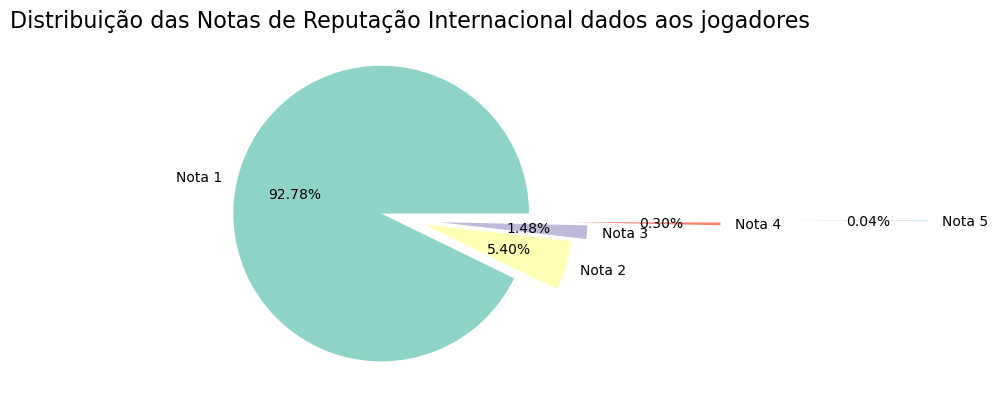

In [14]:
import brewer2mpl
paleta_cores = brewer2mpl.get_map('Set3', 'Qualitative', 5).mpl_colors
plt.pie(x=df['international_reputation'].value_counts(),
        labels=['Nota 1','Nota 2','Nota 3','Nota 4','Nota 5'],
        explode=[0.2, 0.1, 0.2, 1.1,2.5],
        colors=paleta_cores,
        autopct='%1.2f%%')
plt.title('Distribuição das Notas de Reputação Internacional dados aos jogadores', size=16);

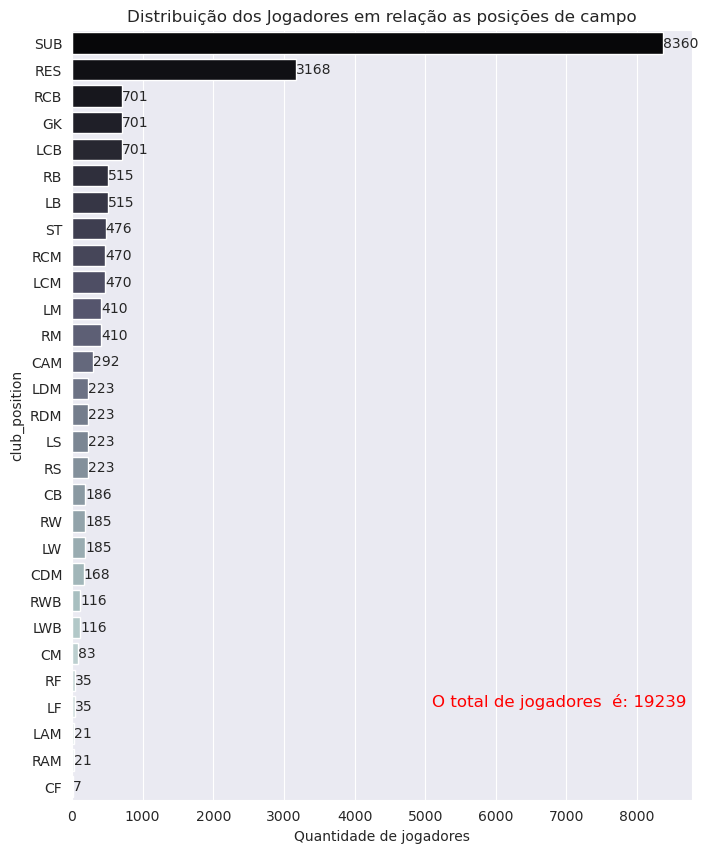

In [15]:
sns.set_style('darkgrid')
ax = plt.figure(figsize=(8,10))
ax=sns.barplot(y=df['club_position'].value_counts().index,
                x=df['club_position'].value_counts().values,
                hue=df['club_position'].value_counts().index,
                palette='bone')

for container in ax.containers:
    ax.bar_label(container)
plt.text(5100,25, f"O total de jogadores  é: {len(df)}", color='red', fontsize=12)
plt.title('Distribuição dos Jogadores em relação as posições de campo')
plt.xlabel('Quantidade de jogadores');
sns.set_style(original_style)

<span style='color:#006699; font-size:16px'> Como podemos ver grande parte dos jogadores são considerados como substitutos
e de reserva no dataset. Esse número são grandes porque jogadores classificados como substitutos podem ser jovens talentos em
desenvolvimento, que ainda não são titulares de times, nem que ocupam as vagas de reservas. Também podem ser jogadores
que não alcançaram um nível de habilidade específica que o enquadre em uma determinaada posição. Em suma ajuda a diferenciar jogadores principais e os de apoio. </span>

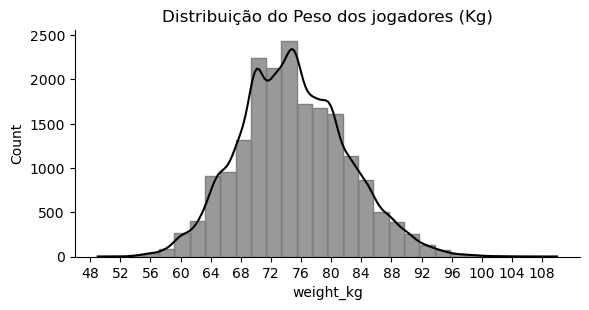

In [16]:
sns.displot(df['weight_kg'], color='Black',alpha=0.4, kde=True, aspect=2, height=3,edgecolor='Gray', bins=30)
plt.xticks(np.arange(48,110,4))
plt.title('Distribuição do Peso dos jogadores (Kg)');

<span style='color:#003333; font-size:18px'>A amplitude do peso para jogadores de futebol tem como mínimo por folta dos 56kg e no máximo 96 kg. Sua média e maioria se encontram na casa dos 70kg.</span>

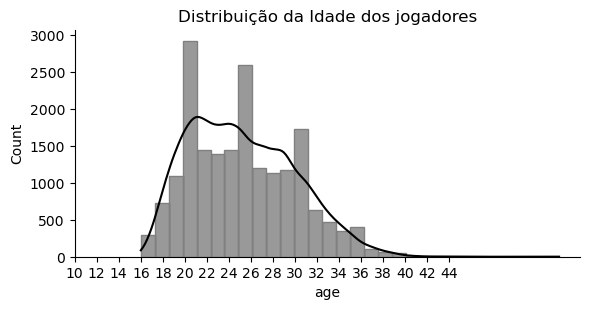

In [17]:
sns.displot(df['age'], color='Black',alpha=0.4, kde=True, aspect=2, height=3,edgecolor='Gray', bins=30)
plt.xticks(np.arange(10,46,2))
plt.title('Distribuição da Idade dos jogadores');

<span style='color:#003333; font-size:18px'>A idade dos jogadores estão entre 16 e 40 anos, se concentrando entre os 22 e 30 anos e com três picos nos 21, 25 e 31 anos.</span>

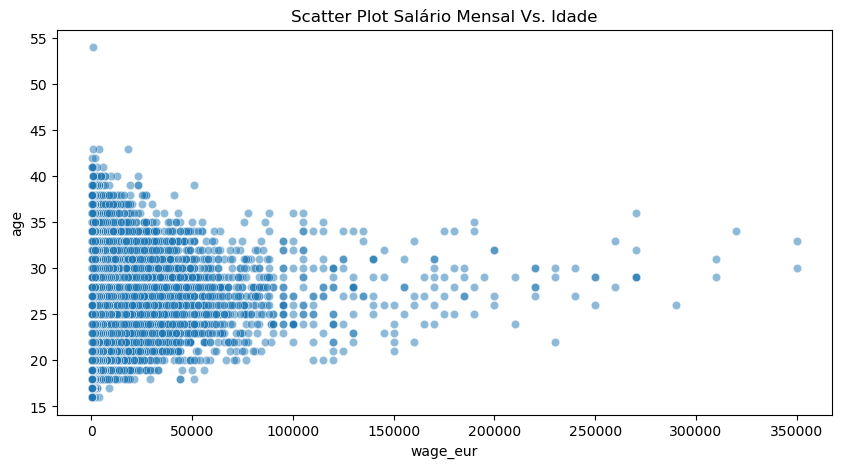

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=df['age'], x=df['wage_eur'], alpha=0.5)
plt.title('Scatter Plot Salário Mensal Vs. Idade');

<span style='color:#003333; font-size:18px'>O auge da carreira dos jogadores, no quesito remuneração pelo  que mostra o gráfico, está entra os jogadores que possuem 22 a 36 anos.</span>


In [19]:
display(HTML(f"<span style='color:#336633; font-size:18px'>Os TOP 10 jogadores mais bem pagos do mundo.</span>"))
df[df['wage_eur'] >= 100000][['short_name','club_name','wage_eur','nationality_name']]\
.sort_values(by='wage_eur', ascending=False).head(10).reset_index(drop=True).style.background_gradient(cmap='Greens',)

,short_name,club_name,wage_eur,nationality_name
0,K. De Bruyne,Manchester City,350000,Belgium
1,K. Benzema,Real Madrid CF,350000,France
2,L. Messi,Paris Saint-Germain,320000,Argentina
3,Casemiro,Real Madrid CF,310000,Brazil
4,T. Kroos,Real Madrid CF,310000,Germany
5,R. Sterling,Manchester City,290000,England
6,Cristiano Ronaldo,Manchester United,270000,Portugal
7,Neymar Jr,Paris Saint-Germain,270000,Brazil
8,R. Lewandowski,FC Bayern München,270000,Poland
9,M. Salah,Liverpool,270000,Egypt


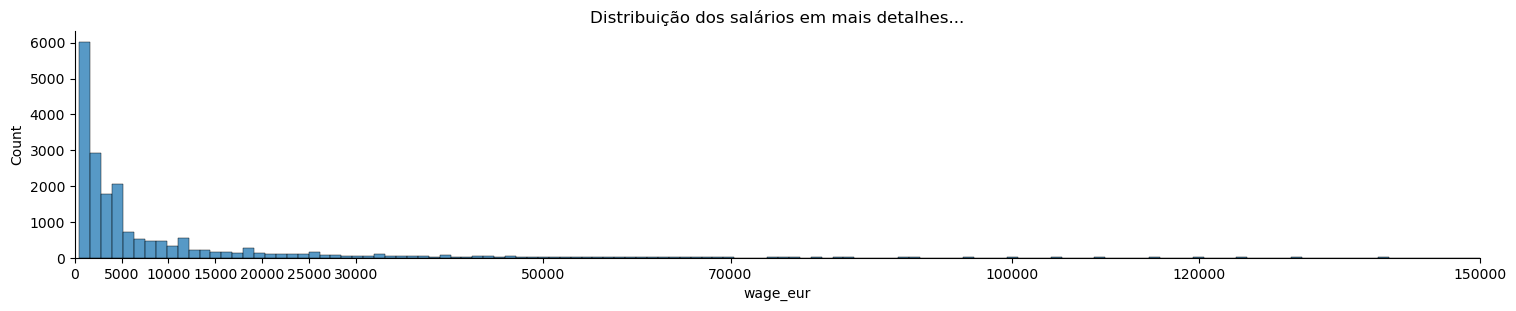

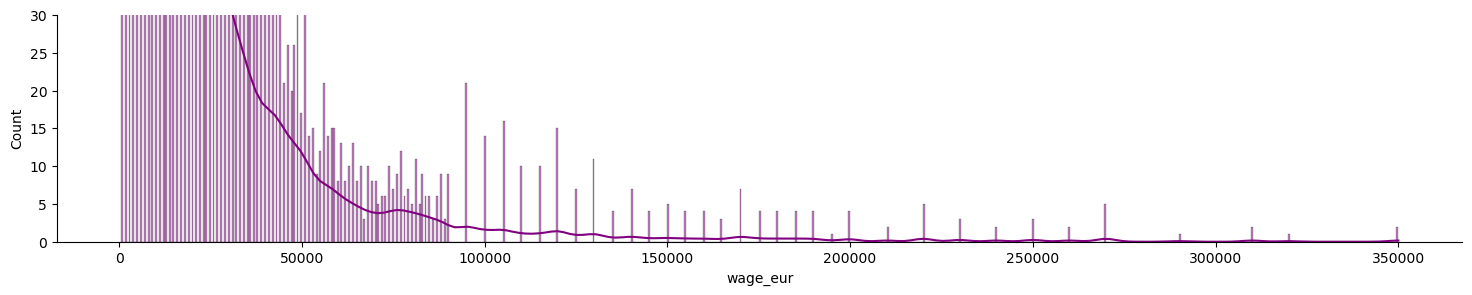

In [20]:
sns.displot(df['wage_eur'], bins=300,aspect=5, height=3)
plt.xticks([0,5000,10000,15000,20000,25000,30000,50000,70000,100000,120000,150000,200000,250000,300000])
plt.xlim(0,150000)
plt.title('Distribuição dos salários em mais detalhes...');

sns.displot(df['wage_eur'], aspect=5, height=3, kde=True, color='purple')
plt.yticks([0,5,10,15,20,25,30])
plt.ylim(0,30);

<span style='color:#333333; font-size:16px'>No Gráfico acima (primeiro) podemos verificar que a maioria dos jogadores recebem um salário inferior a 5.000 euros mensais. No segundo nos mostra em melhores detalhes a quantidade de jogadores que ganham salários acima de 100.000 euros mensais, podemos contabilizá-los facilmente. </span>

In [21]:
display(HTML(f"<span style='color:#336633; font-size:18px'>Os TOP 10 clubes em desembolso de salários de jogadores</span>"))
df.groupby('club_name')[['wage_eur']].agg('sum').sort_values(by='wage_eur', ascending=False).head(10).reset_index()

,club_name,wage_eur
0,Real Madrid CF,4394000
1,Manchester City,3610400
2,Manchester United,3407000
3,FC Barcelona,3230000
4,Liverpool,3211000
5,Paris Saint-Germain,3000000
6,Chelsea,2978000
7,Inter,2384000
8,Leicester City,2267000
9,Tottenham Hotspur,2081000


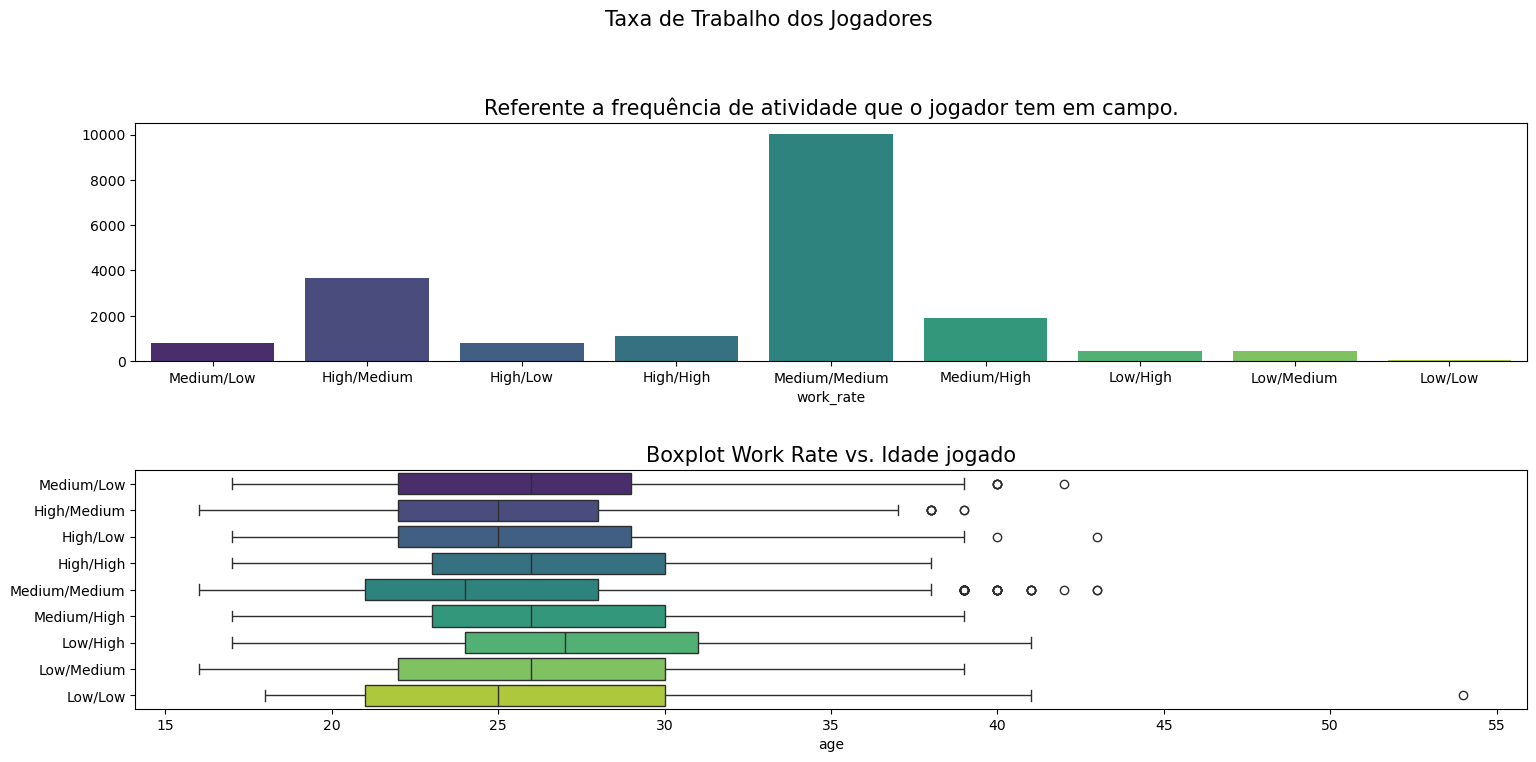

In [22]:
fig, axs = plt.subplots(2,1, figsize=(16,8))

sns.countplot(x=df['work_rate'], hue=df['work_rate'], palette='viridis', ax=axs[0])
axs[0].set_title('Referente a frequência de atividade que o jogador tem em campo.', size=15)
axs[0].set_ylabel(None)

sns.boxplot(x=df['age'], y=df['work_rate'], hue=df['work_rate'], palette='viridis', ax=axs[1])
axs[1].set_title('Boxplot Work Rate vs. Idade jogado', size=15)
axs[1].set_ylabel(None)
plt.suptitle('Taxa de Trabalho dos Jogadores', size=15)
plt.tight_layout(pad=3)

<span style='color:#006699; font-size:16px'>A Taxa de Trabalho - Work Rate - é uma medida que descreve a quantidade de esforço e movimento que um jgador dedica às fases ofensivas e defensivas do jogo. Ou seja, exemplo, High/Low indica que o jogador participa das ações ofensivas em modo "High" e das ações defensivas em modo "Low". Essa classificaçào é tanto em frequência como em esforço. Esta informação pode impactar tanto na estratégia tática, pocisionamento do jogador e no condicionamento físico do mesmo alertando a direção a hora de substituir o jogador em campo. É uma ferramenta para entender  e otimizar o comportamento dos jogadores em i=diferentes fases do jogo, permitindo uma gestão tática eficaz.  A maioria dos  tem uma taxa Medium/Medium o que, depedendo das habilidades analisadas de cada, podemos realizar treinamentos específicos para cada um e transformar o stilo de jogo do mesmo para desempenhar um papel tático no jogo. Notamos também que a idade tem pouca influência para determinar que classificação de taxa de trabalho ele irá pertencer.</span>

In [23]:
display(HTML(f"<span style='color:#336633; font-size:18px'>Os TOP 10 jogadores por categoria de Work Tax em 2022.</span>"))
@interact
def work(categoria = ['High/High', 'High/Low', 'High/Medium', 'Low/High', 'Low/Low','Low/Medium', 'Medium/High', 'Medium/Low', 'Medium/Medium']):
    return df[df['work_rate'] == categoria][['short_name','age','club_name','overall','nationality_name']]\
.sort_values(by=['overall','age'], ascending=[False, False])\
.head(10).reset_index(drop=True)

interactive(children=(Dropdown(description='categoria', options=('High/High', 'High/Low', 'High/Medium', 'Low/…

Text(0.5, 1.0, 'Perna Preferida dos jogadores')

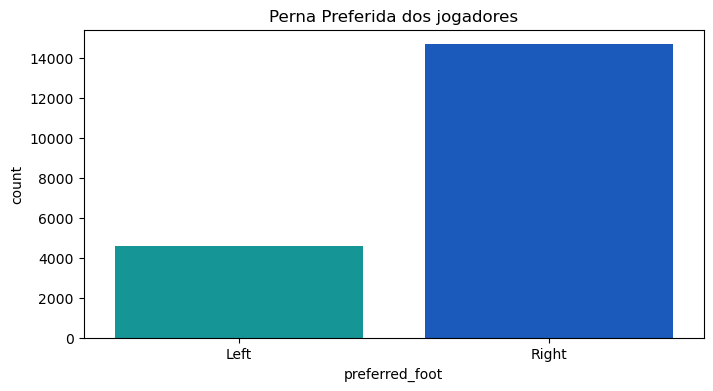

In [24]:
display(HTML(f"<span style='color:#336633; font-size:18px'>Análise da preferência das Pernas</span>"))
plt.figure(figsize=(8,4))
sns.countplot(x=df['preferred_foot'], hue=df['preferred_foot'], palette='winter_r')
plt.title('Perna Preferida dos jogadores')

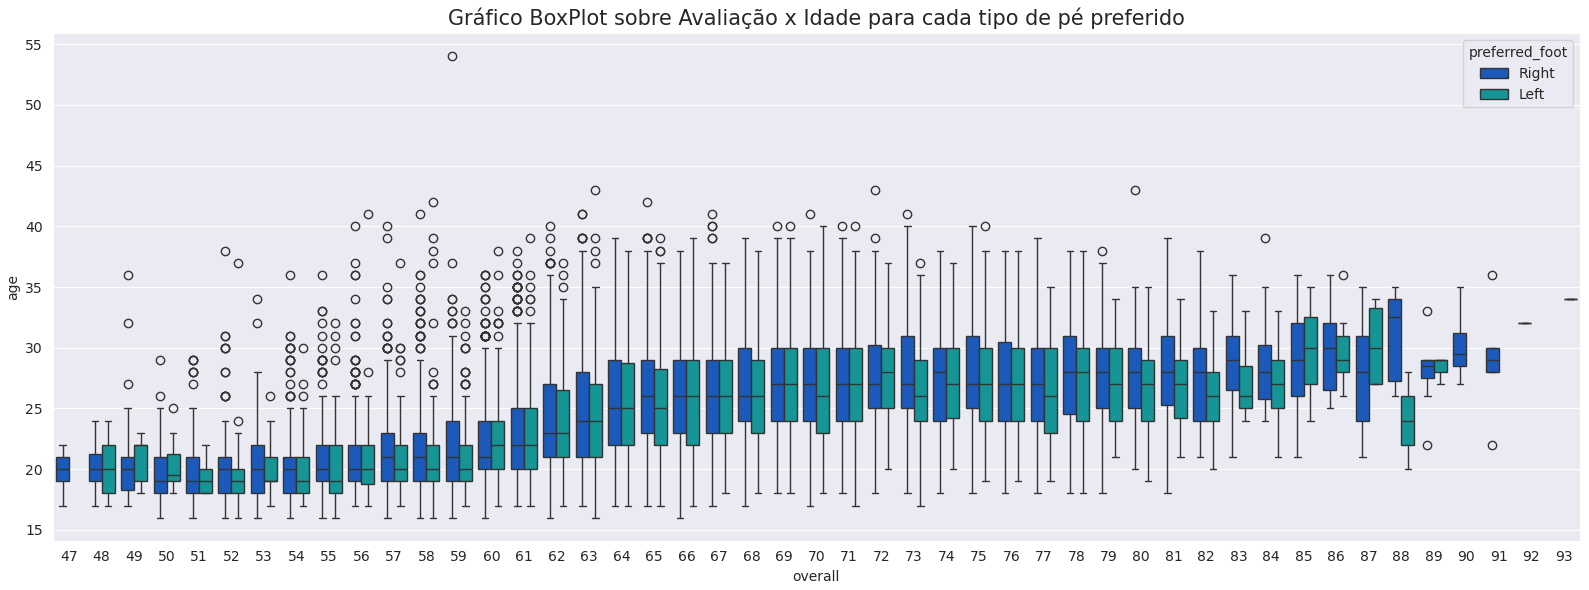

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,6))
sns.boxplot(x=df['overall'], y=df['age'], hue=df['preferred_foot'], palette='winter')
plt.title('Gráfico BoxPlot sobre Avaliação x Idade para cada tipo de pé preferido', size=15)
plt.tight_layout()
sns.set_style(original_style)

<span style='color:#006699; font-size:16px'>Esta informação impacta diretamente, tanto no desempenho individual do jogador como na estratégia da equipe. Como principais motivos a análise pode ajudar no pocisonamento e função que o jogador irá ocupar, técnicas de ataque e defesa (como conhecer e explorar as fraquezas do adversário), desempenho em lances específicos como cruzamentos e cobranças de falta. Além disso, jogadores podem receber treinamento específicos para melhorar a habilidade do outro pé tornando-os mais imprevisíveis e eficazes em campo. Jogadores ambidentros possuem uma versatilidade maior.</span>

### Análise referentes a nacionalidade

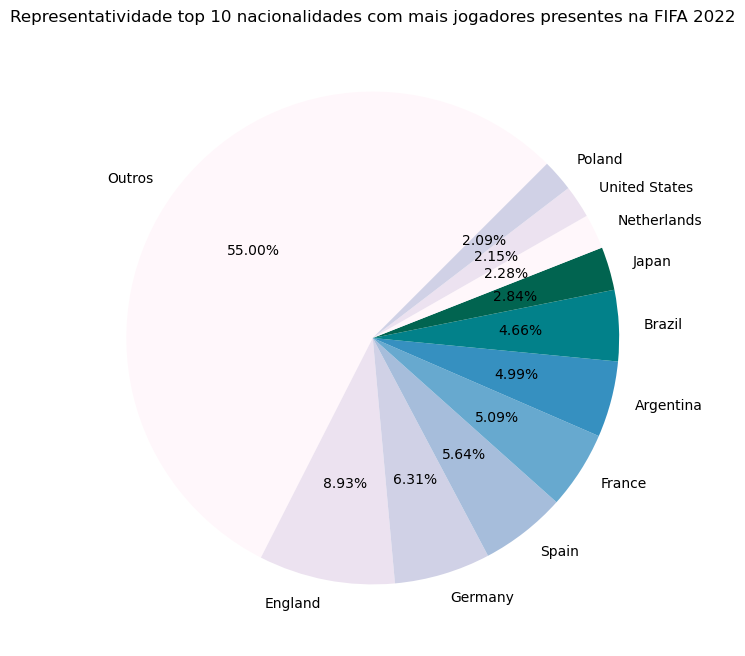

In [26]:
import brewer2mpl
df['nationality_top_10'] = df['nationality_name']\
.map(lambda x: x if x in (df['nationality_name'].value_counts().head(10).index.to_list()) else 'Outros')
paleta_cores = brewer2mpl.get_map('PuBuGn', 'Sequential', 8).mpl_colors
plt.figure(figsize=(8,8))
plt.pie(df['nationality_top_10'].value_counts(),
        labels=df['nationality_top_10'].value_counts().index,
        colors=paleta_cores,
        autopct='%1.2f%%',
        startangle=45)
plt.title('Representatividade top 10 nacionalidades com mais jogadores presentes na FIFA 2022');

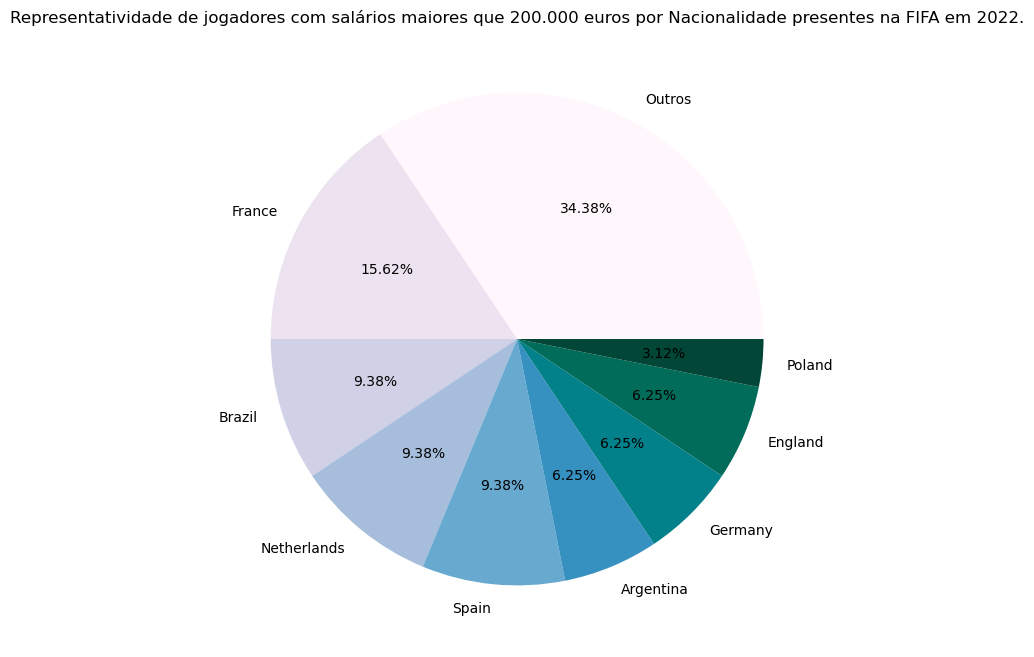

In [27]:
paleta_cores = brewer2mpl.get_map('PuBuGn', 'Sequential', 9).mpl_colors
plt.figure(figsize=(8,8))
plt.pie(df[df['wage_eur'] >= 200000]['nationality_top_10'].value_counts(),
        labels=df[df['wage_eur'] >= 200000]['nationality_top_10'].value_counts().index,
        colors=paleta_cores,
        autopct='%1.2f%%')
plt.title('Representatividade de jogadores com salários maiores que 200.000 euros por Nacionalidade presentes na FIFA em 2022.');

<span style='color:#006699; font-size:16px'>Notamos que 10 países concentram praticamente a métade dos jogadores do mundo e 66% dos contratos acima de 200.000 euros por mês. Inglaterra, Alemanha e Espanha possuem mais jogadores e França, Brasil e Holanda o maior número de contratos acima de 200.000 euros.</span>

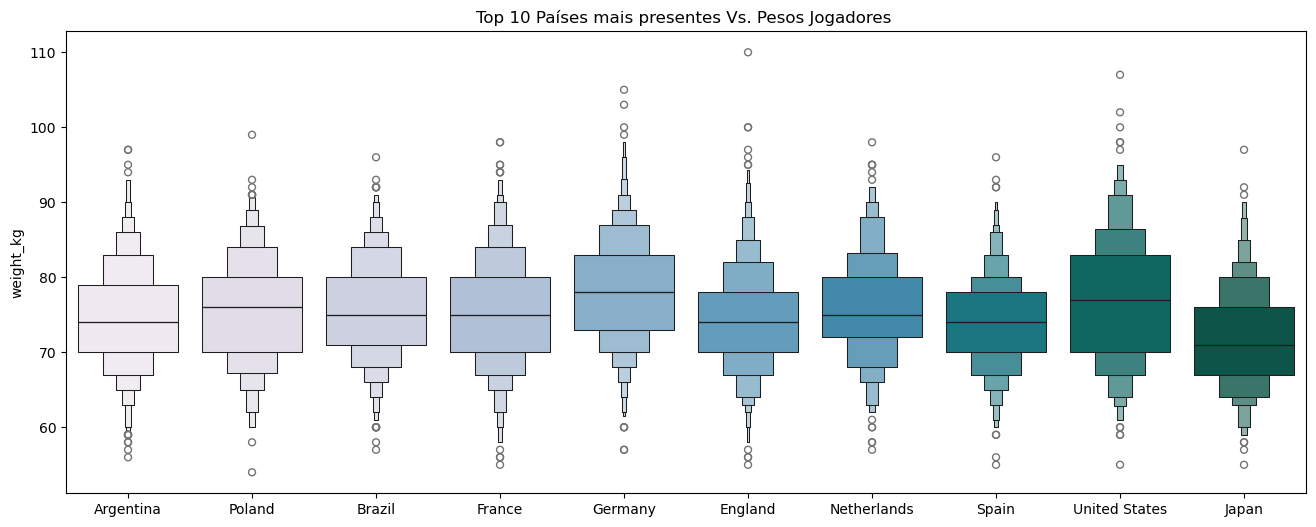

In [28]:
top10_paises = df['nationality_name'].value_counts().head(10).index.to_list()
df_top_10 = df[df['nationality_name'].isin(top10_paises)]

plt.figure(figsize=(16,6))
sns.boxenplot(x=df_top_10['nationality_name'], y=df_top_10['weight_kg'], hue=df_top_10['nationality_name'], palette='PuBuGn')
plt.xlabel(None)
plt.title('Top 10 Países mais presentes Vs. Pesos Jogadores ');

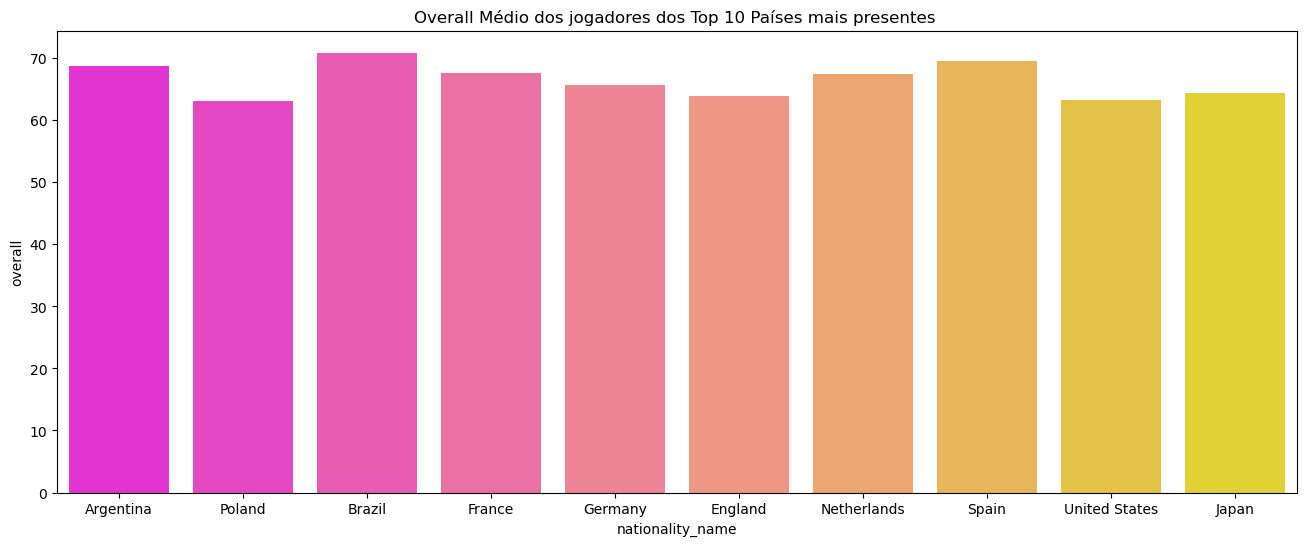

In [29]:
top10_paises = df['nationality_name'].value_counts().head(10).index.to_list()
df_top_10 = df[df['nationality_name'].isin(top10_paises)]

plt.figure(figsize=(16,6))
sns.barplot(x=df_top_10['nationality_name'], y=df_top_10['overall'],
            hue=df_top_10['nationality_name'], palette='spring', errorbar=None)
plt.title('Overall Médio dos jogadores dos Top 10 Países mais presentes ');

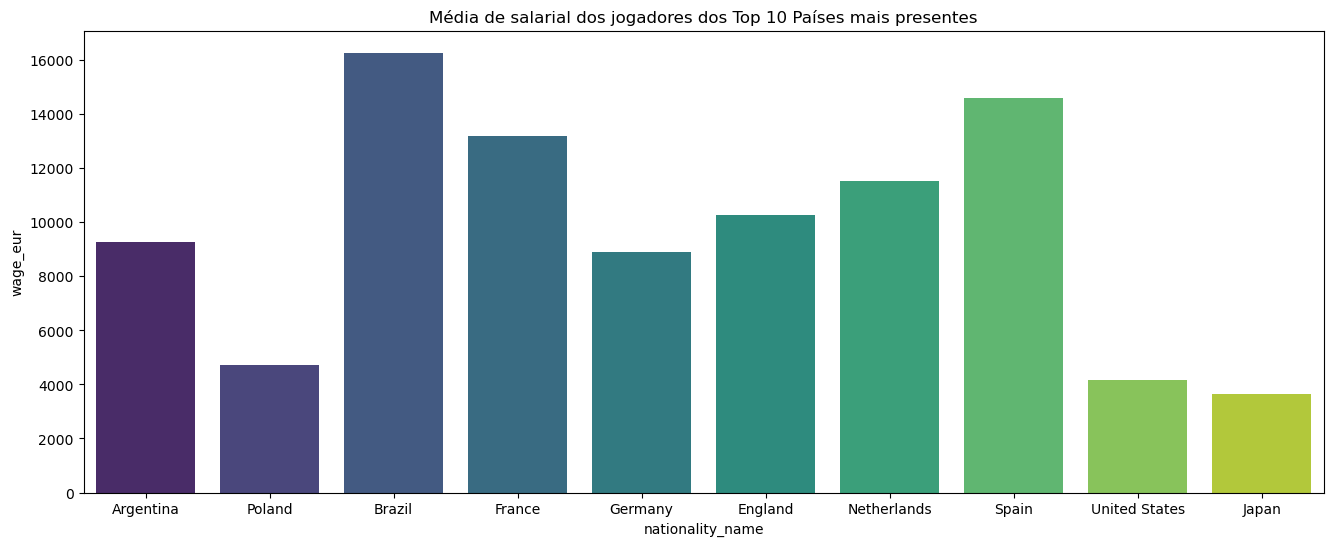

In [30]:
top10_paises = df['nationality_name'].value_counts().head(10).index.to_list()
df_top_10 = df[df['nationality_name'].isin(top10_paises)]

plt.figure(figsize=(16,6))
sns.barplot(x=df_top_10['nationality_name'], y=df_top_10['wage_eur'], hue=df_top_10['nationality_name'], palette='viridis', errorbar=None)
plt.title('Média de salarial dos jogadores dos Top 10 Países mais presentes');

<span style='color:#006699; font-size:16px'>Podemos comprovar que os Brasileiros são os jogadores mais bem pagos do planeta, seguidos pelos Espanhois e Franceses.</span>

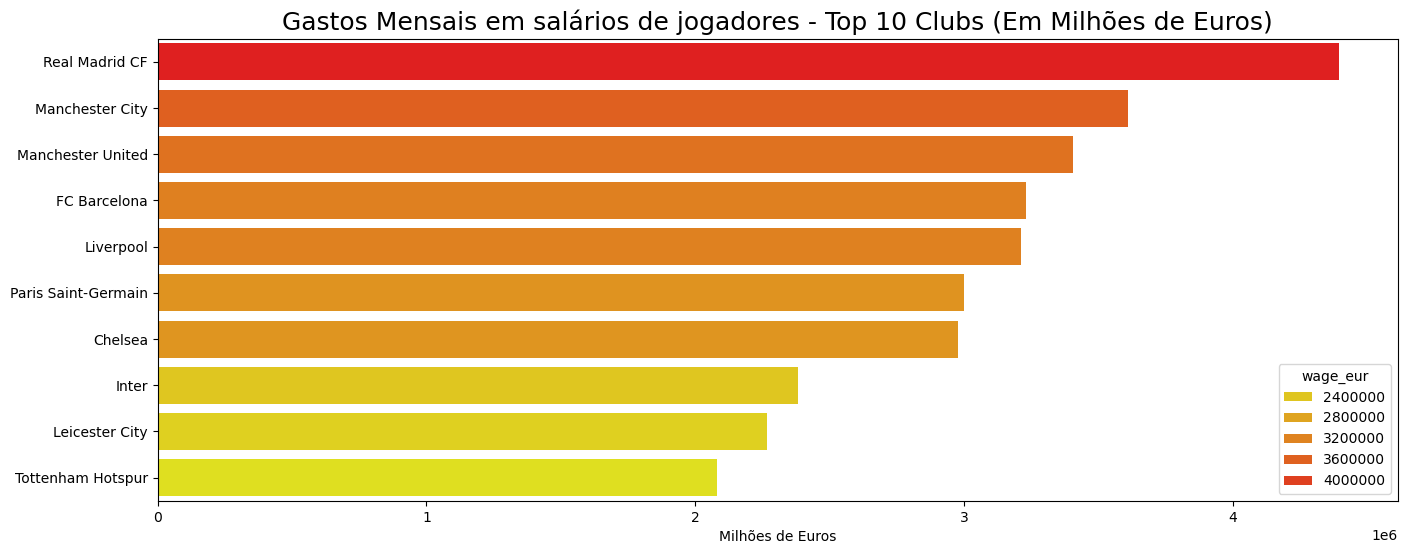

In [31]:
top_10_clubs = df.groupby('club_name')[['club_name','wage_eur']]\
.sum('wage_eur').sort_values(by='wage_eur', ascending=False).head(10).reset_index()
plt.figure(figsize=(16,6))
sns.barplot(y=top_10_clubs['club_name'], x=top_10_clubs['wage_eur'], hue=top_10_clubs['wage_eur'] , palette='autumn_r')
plt.title('Gastos Mensais em salários de jogadores - Top 10 Clubs (Em Milhões de Euros)', size=18)
plt.xlabel('Milhões de Euros')
plt.ylabel(None);

In [32]:
top_10_clubs = df.groupby('club_name')[['club_name','wage_eur']]\
.sum('wage_eur').sort_values(by='wage_eur', ascending=False).head(10).reset_index().style.background_gradient(cmap='autumn_r')
top_10_clubs

,club_name,wage_eur
0,Real Madrid CF,4394000
1,Manchester City,3610400
2,Manchester United,3407000
3,FC Barcelona,3230000
4,Liverpool,3211000
5,Paris Saint-Germain,3000000
6,Chelsea,2978000
7,Inter,2384000
8,Leicester City,2267000
9,Tottenham Hotspur,2081000


___

## Query Analysis

In [33]:
df_query = df.drop(df[(df['club_position'] == 'Não Informado') & (df['club_name'] == 'Não Informado')].index, axis=0)
df_query['club_jersey_number'] = round(df_query['club_jersey_number'].astype('int'))
df_query['wage_eur'] = round(df_query['wage_eur'].astype('int'))
df_query['value_eur'] = round(df_query['value_eur'].astype('int'))
df_query['club_contract_valid_until'] = round(df_query['club_contract_valid_until'].astype('int'))

In [34]:
display(HTML(f"<span style='color:purple; font-size:20px'>Lista com os jogadores melhores pontuados em Overall de cada posição em campo.</span>"))
df_query.iloc[df_query\
    .groupby('club_position')['overall']\
    .idxmax()][['club_position','short_name','age','club_name','nationality_name','overall']]\
    .sort_values(by='overall', ascending=False)\
    .style.background_gradient(cmap='pink', subset=['overall'])

,club_position,short_name,age,club_name,nationality_name,overall
0,RW,L. Messi,34,Paris Saint-Germain,Argentina,93
1,ST,R. Lewandowski,32,FC Bayern München,Poland,92
3,LW,Neymar Jr,29,Paris Saint-Germain,Brazil,91
4,RCM,K. De Bruyne,30,Manchester City,Belgium,91
5,GK,J. Oblak,28,Atlético de Madrid,Slovenia,91
14,CDM,Casemiro,29,Real Madrid CF,Brazil,89
11,CF,K. Benzema,33,Real Madrid CF,France,89
15,LCB,V. van Dijk,29,Liverpool,Netherlands,89
19,RDM,J. Kimmich,26,FC Bayern München,Germany,89
23,RS,L. Suárez,34,Atlético de Madrid,Uruguay,88


In [35]:
lista_top_30_Clubs = df.groupby('club_name').sum('wage_eur').sort_values(by='wage_eur', ascending=False).head(30).index.to_list()
display(HTML(f"<span style='color:purple; font-size:20px'>Lista dos jogadores presentes nos 30 maiores clubes do mundo em 2022</span>"))
@interact
def club(club = lista_top_30_Clubs):
    return df_query[df_query['club_name'] == club][['short_name','age',
                                                    'club_jersey_number',
                                                    'club_position','nationality_name',
                                                    'overall','wage_eur','value_eur','club_contract_valid_until']]\
    .sort_values(by='overall', ascending=False).reset_index(drop=True)\
    .style.background_gradient(cmap='ocean_r', subset=['overall'])

interactive(children=(Dropdown(description='club', options=('Real Madrid CF', 'Manchester City', 'Manchester U…

<span style='color:purple; font-size:21px'>Lista para análise de habilidades ordenados por Overall em 2022</span>
 - Os 20 mais pontuados jogadores.
 - Escolha a habilidade de estudo
 - Em score seleciona a pontuação mínima para avaliar os jogadores com pontuações iguais ou maiores ao limite.

In [36]:
@interact
def skill(skills = ['attack', 'defend', 'phisical','mental_reactions', 'passing', 'control_ball', 'goalkeeper'], score=(0,100,1)):

    return df_query[df_query[skills] > score][['short_name','age','club_name','club_position','nationality_name','overall',skills]]\
    .sort_values(by=skills, ascending=False).head(20)\
    .style.background_gradient(cmap='ocean_r', subset=['overall',skills])

interactive(children=(Dropdown(description='skills', options=('attack', 'defend', 'phisical', 'mental_reaction…

<span style='color:purple; font-size:21px'>Lista dos jogadores que pertencem a uma das 10 mais presentes nacionalidades na FIFA em 2022</span>
- a lista mostra os 30 jogadores melhores no rank Overall.
- Mostra os clubes os quais estão jogando.

In [37]:
TOP_10_countries = df['nationality_name'].value_counts().head(10).index

@interact
def onde_jogam(Pais = TOP_10_countries):
    return df_query[df_query['nationality_name'] == Pais][['short_name','club_name',
                                                             'club_position','overall','wage_eur','value_eur',
                                                             'club_contract_valid_until']]\
    .sort_values(by=['overall'], ascending=[False]).head(30).reset_index(drop=True)\
    .style.background_gradient(subset=['overall'])

interactive(children=(Dropdown(description='Pais', options=('England', 'Germany', 'Spain', 'France', 'Argentin…

### Resumo de Informações 

In [38]:
display(HTML(f"<span style='color:purple; font-size:21px'>Resumo com informações que podemos aferir do dataset</span>"))

print(f"\nNúmero de ligas que estão associadas à FIFA em 2022: {len(df['league_name'].unique())} ligas pelo mundo.")
print(f"Números de jogadores cadastrados: {len(df)}\n")
print(f"País com maior representatividade de membros na FIFA em 2022: {df['nationality_name'].value_counts().head(1).index[0]}")
print(f"País com segunda maior representatividade de membros na FIFA em 2022: {df['nationality_name'].value_counts().head(2).index[1]}\n")
print(f"Montante total em salários de jogadores movimentado por mês na FIFA em 2022: {format_currency(df['wage_eur'].sum(), 'EUR', locale='en_US')}")
print(f"Maior salário pago: {format_currency(df['wage_eur'].max(), 'EUR', locale='en_US')} - Jogador : {df['long_name'].iloc[df['wage_eur'].idxmax()]} | clube contratante: {df['club_name'].iloc[df['wage_eur'].idxmax()]}")
print(f"Clube com a maior folha salarial: {df.groupby('club_name')[['club_name','wage_eur']].sum('wage_eur').sort_values(by='wage_eur', ascending=False).reset_index().iloc[0,0]} \
com o total de: {format_currency(df.groupby('club_name')[['club_name','wage_eur']].sum('wage_eur').sort_values(by='wage_eur', ascending=False).reset_index().iloc[0,1], 'EUR', locale='en_US')}\n")
print(f"Quantos jogadores tem salários maiores que € 200.000 por mês: {len(df[df['wage_eur'] >= 200000])}")
print(f"Quantos jogadores tem salários maiores que € 100.000 e menores que € 200.000 por mês: {len(df[(df['wage_eur'] >= 100000) & (df['wage_eur'] < 200000)])} jogadores")
print(f"Quantos jogadores tem salários maiores que € 10.000  e menores que € 100.000 por mês: {len(df[(df['wage_eur'] >= 10000) & (df['wage_eur'] < 100000)])} jogadores")
print(f"Quantos jogadores tem salários menores que € 10.000 por mês: {len(df[(df['wage_eur'] < 10000)])} jogadores\n")
print(f"Primeiro Jogador Classificado com o Maior Overall da FIFA em 2022: {df['long_name'].iloc[df['overall'].idxmax()]} com {df['overall'].iloc[df['overall'].idxmax()]} Pontos de Overall")
print(f"Segundo Jogador Classificado com o Maior Overall da FIFA em 2022: {df['long_name'].iloc[df['overall'].idxmax()+1]} com {df['overall'].iloc[df['overall'].idxmax()+1]} Pontos de Overall")
print(f"Primeiro clube com maior média Overall entre seus jogadores (todos): {df.groupby('club_name')[['club_name','overall']].mean('overall').sort_values(by='overall', ascending=False).reset_index().iloc[0,0]} \
com a média geral de: {round(df.groupby('club_name')[['club_name','overall']].mean('overall').sort_values(by='overall', ascending=False).reset_index().iloc[0,1])} pontos")
print(f"Segundo clube com maior média Overall entre seus jogadores (todos): {df.groupby('club_name')[['club_name','overall']].mean('overall').sort_values(by='overall', ascending=False).reset_index().iloc[1,0]} \
com a média geral de: {round(df.groupby('club_name')[['club_name','overall']].mean('overall').sort_values(by='overall', ascending=False).reset_index().iloc[1,1])} pontos")

print(f"Jogador mais velho em atividade em 2022: {df['short_name'].iloc[df['age'].idxmax()]} com {df['age'].iloc[df['age'].idxmax()]} anos ({df['club_position'].iloc[df['age'].idxmax()]} {df['club_name'].iloc[df['age'].idxmax()]} | Overall: {df['overall'].iloc[df['age'].idxmax()]})")
print(f"Jogador mais novo em atividade em 2022: {df['short_name'].iloc[df['age'].idxmin()]} com {df['age'].iloc[df['age'].idxmin()]} anos ({df['club_position'].iloc[df['age'].idxmin()]} {df['club_name'].iloc[df['age'].idxmin()]} | Overall: {df['overall'].iloc[df['age'].idxmin()]})\n")

print(f"Números de contratos que foram rescindidos em 2022: {len(df[df['club_contract_valid_until'] == 2022])}")
print(f"Números de contratos que serão rescindidos (estavam previstos) este ano (Atual: {datetime.date.today().year}): {len(df[df['club_contract_valid_until'] == datetime.date.today().year])}")


Número de ligas que estão associadas à FIFA em 2022: 56 ligas pelo mundo.
Números de jogadores cadastrados: 19239

País com maior representatividade de membros na FIFA em 2022: England
País com segunda maior representatividade de membros na FIFA em 2022: Germany

Montante total em salários de jogadores movimentado por mês na FIFA em 2022: €173,497,037.00
Maior salário pago: €350,000.00 - Jogador : Kevin De Bruyne | clube contratante: Manchester City
Clube com a maior folha salarial: Real Madrid CF com o total de: €4,394,000.00

Quantos jogadores tem salários maiores que € 200.000 por mês: 32
Quantos jogadores tem salários maiores que € 100.000 e menores que € 200.000 por mês: 138 jogadores
Quantos jogadores tem salários maiores que € 10.000  e menores que € 100.000 por mês: 4109 jogadores
Quantos jogadores tem salários menores que € 10.000 por mês: 14960 jogadores

Primeiro Jogador Classificado com o Maior Overall da FIFA em 2022: Lionel Andrés Messi Cuccittini com 93 Pontos de Overal